In [1]:
from exponential import *
from scipy.optimize import minimize



In [2]:
params=[]
E=[]
N=[]

In [3]:
params=[]
E=[]
N=[]
for i in range(10):
    print(i+1)
    def f(x):
        if x[0]<=0 or x[1]<=0 or x[2]<=0:
            return 10000
        
        theparams=np.array(params+[x]).transpose()

        subspace=Subspace(len(params)+1)

        subspace.set_N_func(N_func)
        subspace.set_H_func(H_func)

        subspace.set_params(theparams)

        subspace.make_N_mat()
        subspace.make_H_mat()
        subspace.find_N_eigens()
        subspace.make_Y_mat()
        subspace.make_invs_sqrt_beta_mats()
        subspace.make_P_mats()
        subspace.find_P_eigens()
        subspace.find_energy_levels()
        return subspace.energy_levels[0]

    res=minimize(f,x0=np.abs(np.array([mp.mpf(400),mp.mpf(1),mp.mpf(0.02)])*np.random.normal(1,1,3)),method='Nelder-Mead')

    if res.fun>=0:
        print("wtf")

    params.append(res.x)

    N.append(i+1)
    E.append(res.fun)

1
2
3
4
5
6
7


KeyboardInterrupt: 

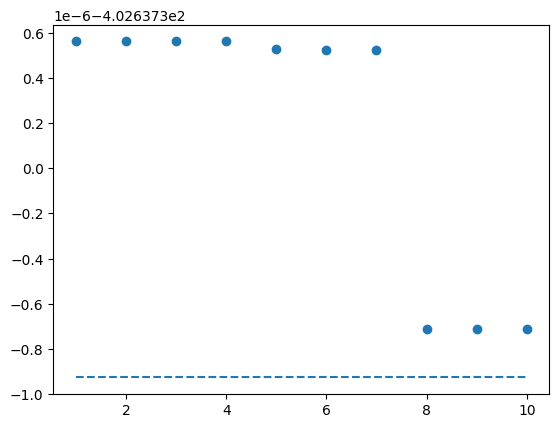

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(N,np.array(E))
plt.plot(N,np.array(N)*0-402.63730092734914,linestyle='--')

In [ ]:
print(E)

[np.float64(-402.63729943727174), np.float64(-402.6372994372741), np.float64(-402.63729943727424), np.float64(-402.63729943727446), np.float64(-402.6372994712978), np.float64(-402.6372994739417), np.float64(-402.6372994739419), np.float64(-402.63730071080164), np.float64(-402.6373007108017), np.float64(-402.6373007110513)]


In [ ]:
def term(ai,bi,ci,aj,bj,cj):
    Ai=2*np.real(ai)+2*np.real(bi)
    Bi=2*np.real(ai)+2*np.real(ci)
    Ci=2*np.real(bi)+2*np.real(ci)
    Aj=2*np.real(aj)+2*np.real(bj)
    Bj=2*np.real(aj)+2*np.real(cj)
    Cj=2*np.real(bj)+2*np.real(cj)

    return (
        np.sqrt(Ai*Aj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Bi*Bj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Ci*Cj)/(np.conjugate(ai+bi)+aj+bj)
        *Ai*Bi*Ci/np.sqrt( Ai**2 * (Bi + Ci) + Bi**2 * (Ai + Ci) + Ci**2 * (Ai + Bi) + Ai*Bi*Ci)
        *Aj*Bj*Cj/np.sqrt( Aj**2 * (Bj + Cj) + Bj**2 * (Aj + Cj) + Cj**2 * (Aj + Bj) + Aj*Bj*Cj)
    )


In [ ]:
np.meshgrid(np.arange(4))

(array([0, 1, 2, 3]),)

In [ ]:
def delta(Amplitudes,params):
    ais, ajs=np.meshgrid(params[0],params[0])
    bis, bjs=np.meshgrid(params[1],params[1])
    cis, cjs=np.meshgrid(params[2],params[2])
    Ampis,Ampjs=np.meshgrid(Amplitudes,Amplitudes)
    terms=term(ais,bis,cis,ajs,bjs,cjs)
    sum=np.sum(np.conjugate(Ampis)*Ampjs*terms)
    return sum/(4*np.pi)

In [ ]:
def HFS(Amplitudes,params):
    expdelta=np.pi*np.sum(Amplitudes/np.real(params[0]+params[1])**3)
    prefactor=(
        (1/(3*hbar))
        *alpha
        *(g2*g3/(m2*m3))
        )
    return prefactor*expdelta

In [ ]:
D=[]
for n in N:
    theparams=np.array(params)[:n].transpose()

    subspace=Subspace(n)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(theparams)

    subspace.make_N_mat()
    subspace.make_H_mat()
    subspace.find_N_eigens()
    subspace.make_Y_mat()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()

    subspace.find_energy_eigenstates()

    D.append(delta(subspace.energy_eigenstates[0],theparams[:,0]))

In [ ]:
H_func(0,0,[mp.mpf(400)],[mp.mpf(1)],[mp.mpf(0.02)])

mpf('-402.62573931652487742904818094828463880636327159502701')

In [ ]:
print(delta([1],[[400],[1],[0.02]]))

0.3352722486863249


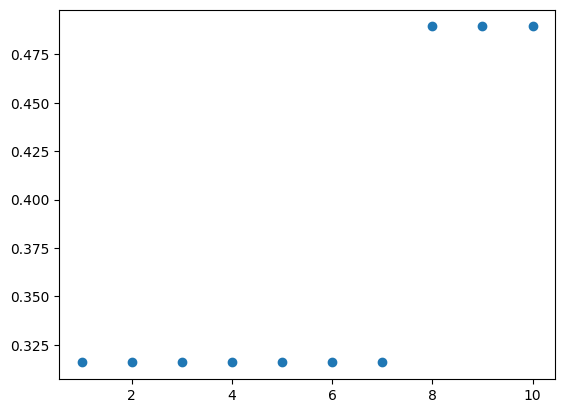

In [ ]:
plt.scatter(N,D)

In [ ]:
print(np.array(D))